In [1]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

from sklearn.tree import DecisionTreeClassifier

In [2]:
raw_data = pd.read_csv('Logistic Regression Dummy Data v3.csv')
print(raw_data.shape)
raw_data.head()

(1006, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [3]:
raw_data.isnull().sum() # Getting sum of all null values in each column

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [4]:
# Visualize the NULL observations

raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data = raw_data.dropna(subset = ['Employment History'])
raw_data.shape

(1001, 14)

In [6]:
raw_data.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [7]:
for column in raw_data:
    unique_value = np.unique(raw_data[column])
    number_of_unique_values = len(unique_value)
    if number_of_unique_values <= 10:
        print('The number of unique values in feature {} is {} - {}'.format(column, number_of_unique_values, unique_value))
    else:
        print("The number of unique values in feature {} is: {}".format(column, number_of_unique_values))

The number of unique values in feature Type of Account is 4 - ['No Data' 'Type A' 'Type B' 'Type C']
The number of unique values in feature Account History is 3 - ['Average (known delays)' 'Good' 'critical']
The number of unique values in feature Reason for the Loan is 10 - ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of unique values in feature Loan Amount is: 911
The number of unique values in feature Account Savings is 5 - ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of unique values in feature Employment History is 5 - ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of unique values in feature Individual Stauts is 5 - ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of unique values in feature Other Loans is 2 - ['No' 'Yes']
The number of unique values in feature Security / Collateral is 4 -

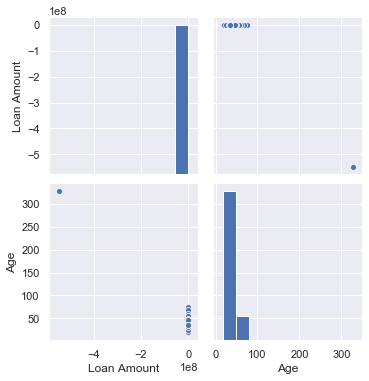

In [8]:
sns.pairplot(raw_data)

In [9]:
# Deleting the outlier

raw_data = raw_data[raw_data['Age'] < 100]

raw_data.shape

(1000, 14)

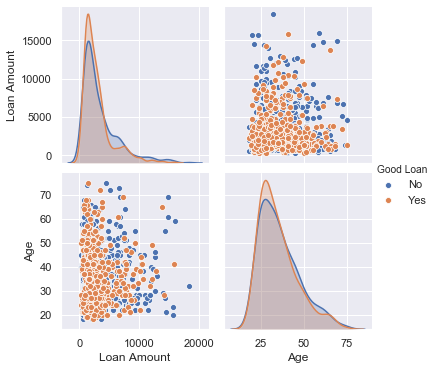

In [10]:
g = sns.pairplot(raw_data, hue = 'Good Loan')

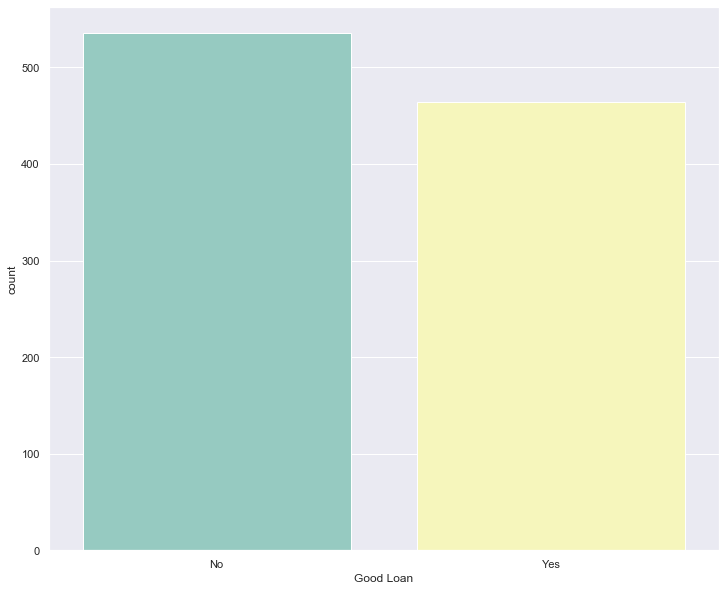

In [11]:
sns.countplot(x = 'Good Loan', data = raw_data, palette = 'Set3')

In [12]:
raw_data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

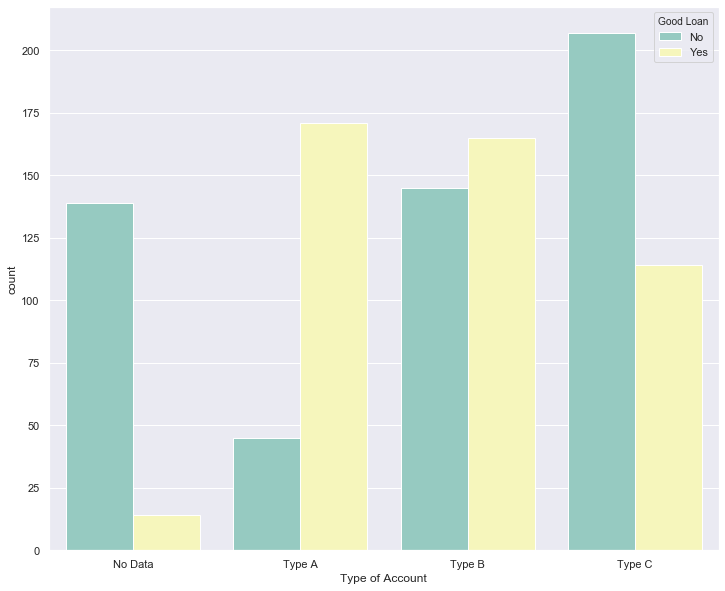

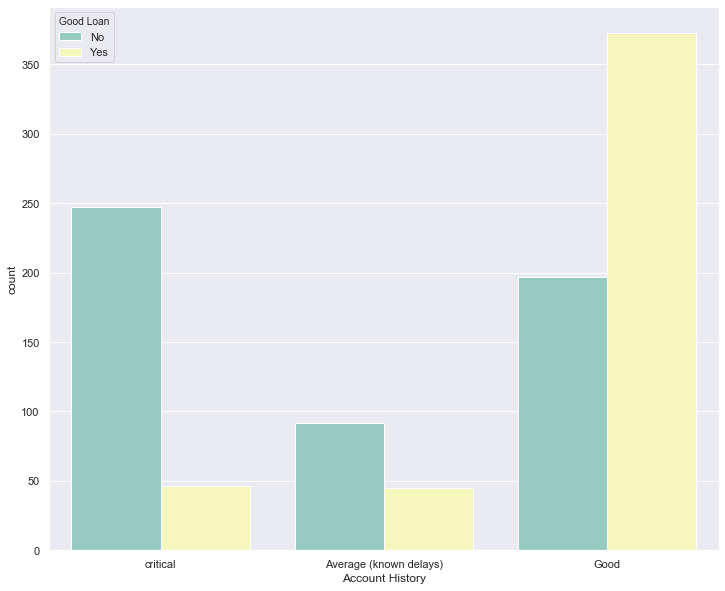

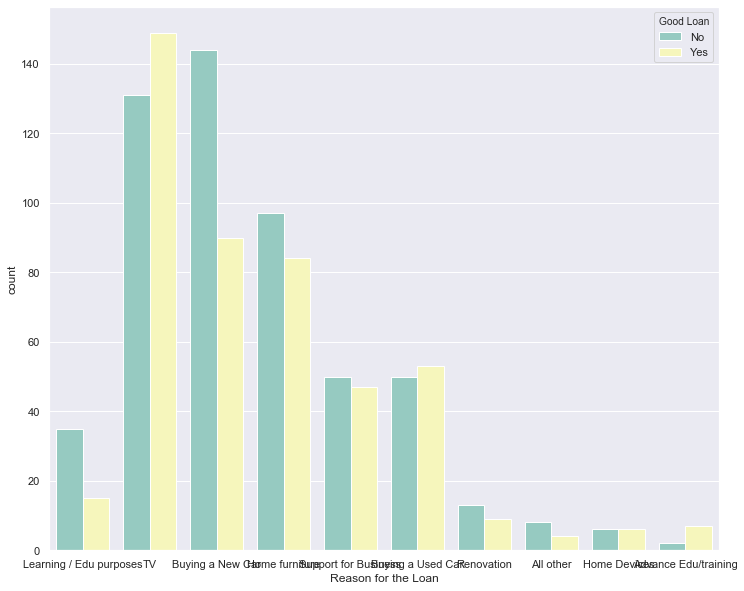

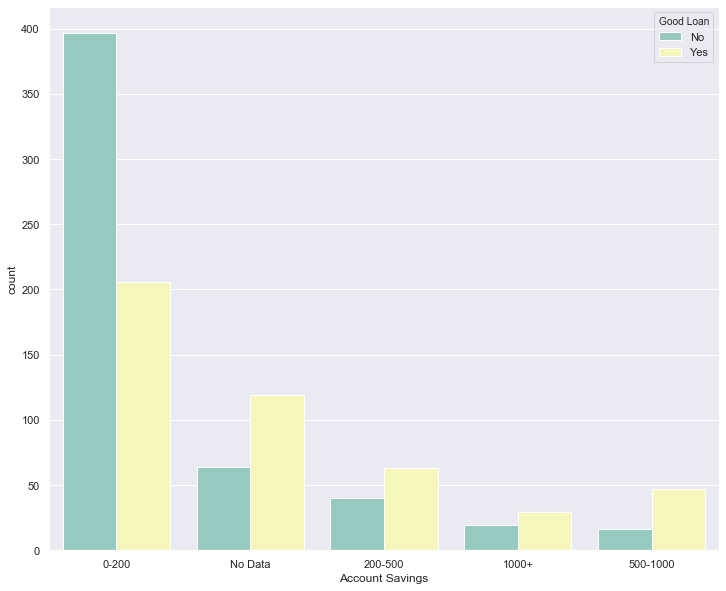

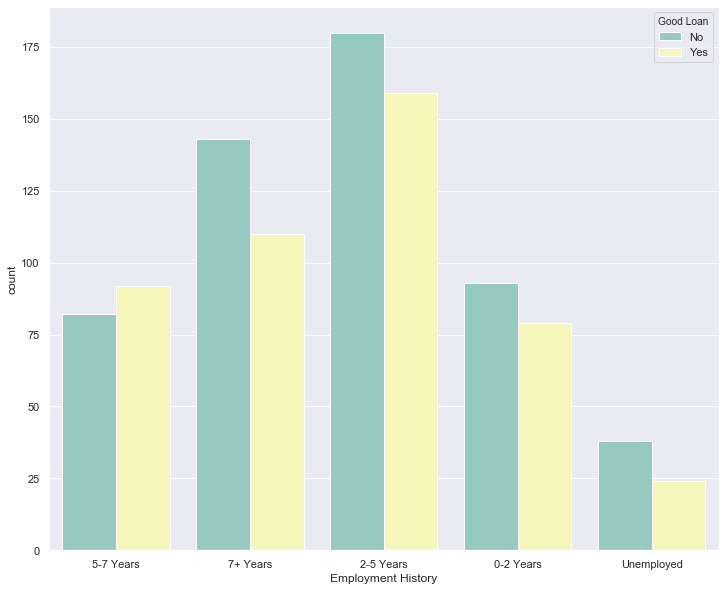

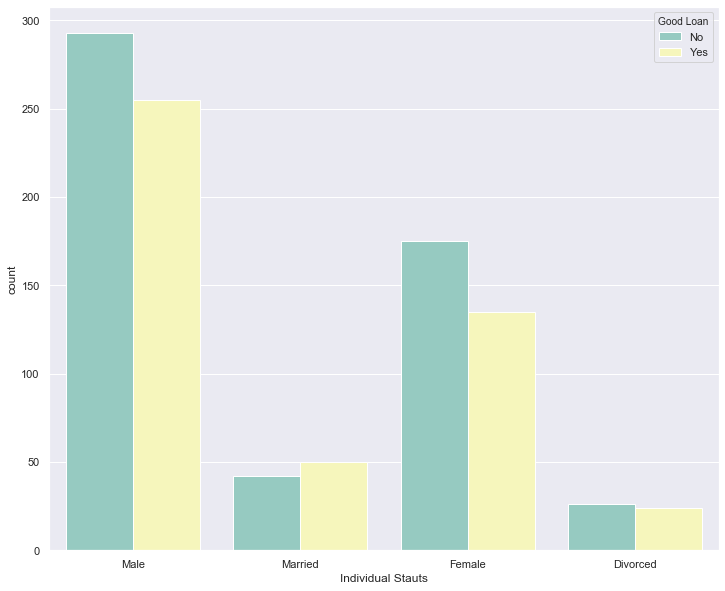

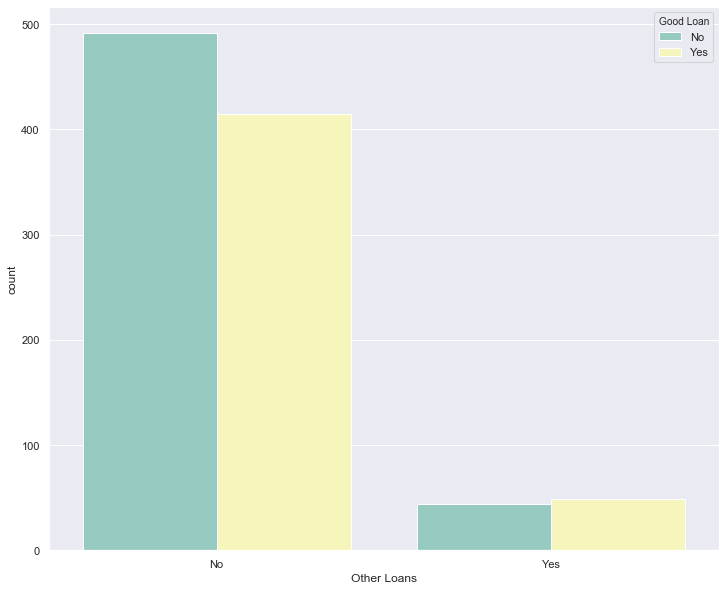

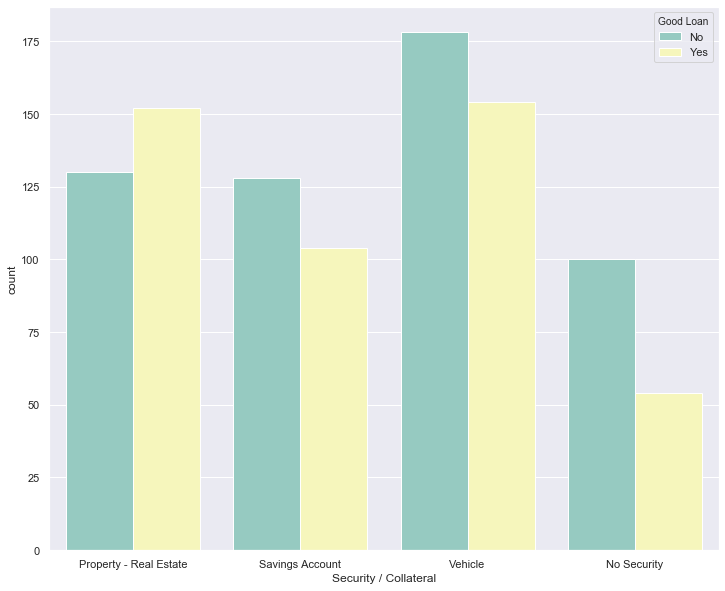

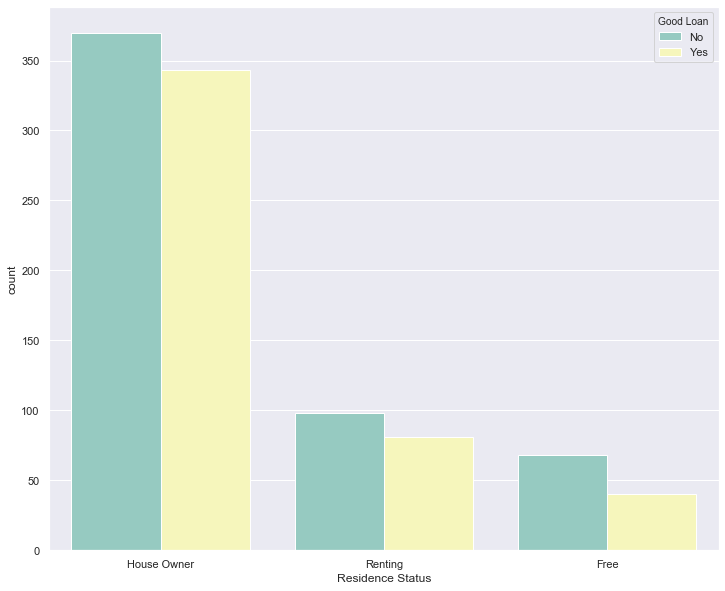

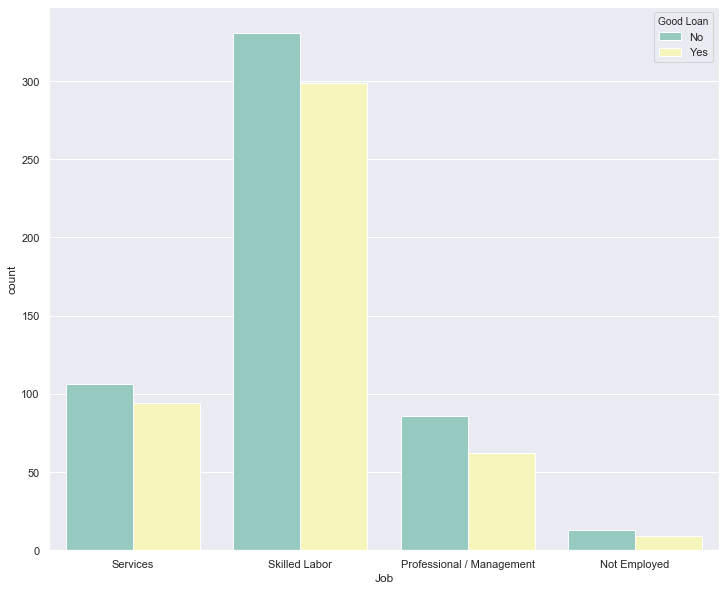

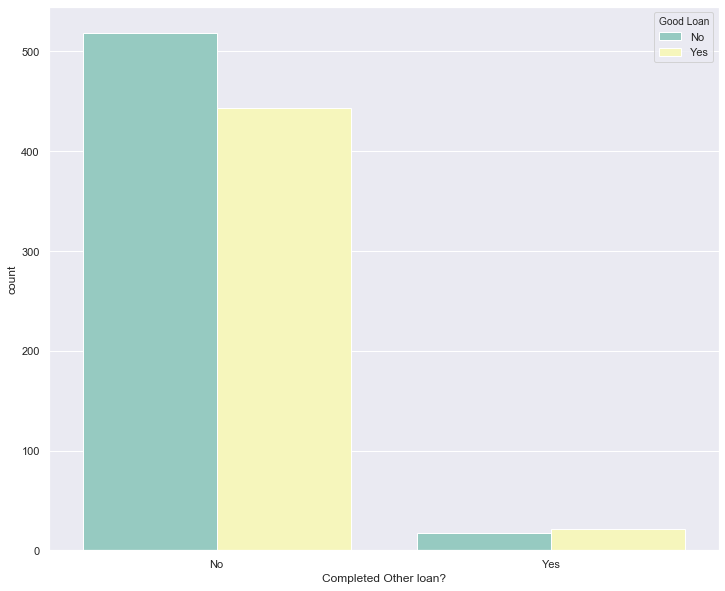

In [13]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [14]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(raw_data.shape)
# print the shape
print(new_raw_data.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

# Visualizing the data
new_raw_data

(1000, 14)
(1000, 49)


/Users/elvis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/elvis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,...,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0


In [27]:
# Split the data into X & y

X = new_raw_data.drop('Good Loan', axis = 1).values
y = new_raw_data['Good Loan']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


array([[2116.0, 47.0, 0, ..., 0, 1, 0],
       [2438.0, 52.0, 0, ..., 1, 1, 0],
       [2144.0, 48.0, 0, ..., 1, 1, 0],
       ...,
       [12759.0, 38.0, 1, ..., 0, 1, 0],
       [2551.0, 47.0, 0, ..., 0, 1, 0],
       [1587.0, 35.0, 1, ..., 0, 1, 0]], dtype=object)

In [25]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [26]:
# Running Feature Importance

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Good Loan', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Loan Amount is : 0.12122079844891431
The feature importance for Age is : 0.07962988068108864
The feature importance for Type of Account_No Data is : 0.054236275712355064
The feature importance for Type of Account_Type A is : 0.04973253970745607
The feature importance for Type of Account_Type B is : 0.0
The feature importance for Type of Account_Type C is : 0.026698167265803152
The feature importance for Account History_Average (known delays) is : 0.0026219295620499047
The feature importance for Account History_Good is : 0.19131616315491018
The feature importance for Account History_critical is : 0.0
The feature importance for Reason for the Loan_Advance Edu/training is : 0.0
The feature importance for Reason for the Loan_All other is : 0.0
The feature importance for Reason for the Loan_Buying a New Car is : 0.012188194319512301
The feature importance for Reason for the Loan_Buying a Used Car is : 0.00657340597791024
The feature importance for Reason for the L

In [29]:
fi_df = zip(fi_col, fi)
print(fi_df)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


,Feature,Feature Importance
0,Loan Amount,0.121221
1,Age,0.079630
2,Type of Account_No Data,0.054236
3,Type of Account_Type A,0.049733
4,Type of Account_Type B,0.000000
5,Type of Account_Type C,0.026698
6,Account History_Average (known delays),0.002622
7,Account History_Good,0.191316
8,Account History_critical,0.000000
9,Reason for the Loan_Advance Edu/training,0.000000


In [31]:
# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()
fi_df

,level_0,index,Feature,Feature Importance
0,0,19,Account Savings_0-200,0.197515
1,1,7,Account History_Good,0.191316
2,2,0,Loan Amount,0.121221
3,3,1,Age,0.079630
4,4,2,Type of Account_No Data,0.054236
5,5,3,Type of Account_Type A,0.049733
6,6,5,Type of Account_Type C,0.026698
7,7,45,Job_Skilled Labor,0.020597
8,8,34,Other Loans_Yes,0.017520
9,9,23,Account Savings_No Data,0.016471


In [32]:
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]
columns_to_keep

0                            Account Savings_0-200
1                             Account History_Good
2                                      Loan Amount
3                                              Age
4                          Type of Account_No Data
5                           Type of Account_Type A
6                           Type of Account_Type C
7                                Job_Skilled Labor
8                                  Other Loans_Yes
9                          Account Savings_No Data
10        Reason for the Loan_Support for Business
11                          Reason for the Loan_TV
12                           Account Savings_1000+
13    Security / Collateral_Property - Real Estate
14            Reason for the Loan_Buying a New Car
15                                    Job_Services
16                    Residence Status_House Owner
17                    Employment History_0-2 Years
18              Reason for the Loan_Home furniture
19                         Acco